# DS4420 - Homework 3
Gavin Wainwright

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import fsolve

Question 2

In [2]:
sat = np.genfromtxt('SAT.csv')
lunch = np.genfromtxt('lunch_wait_time.csv')
age = np.genfromtxt('student_age.csv')

**Probability Distributions for Each Dataset:**

SAT - Normal Distribution
lunch_wait_time - Exponential Distribution
student_age - Uniform Distribution

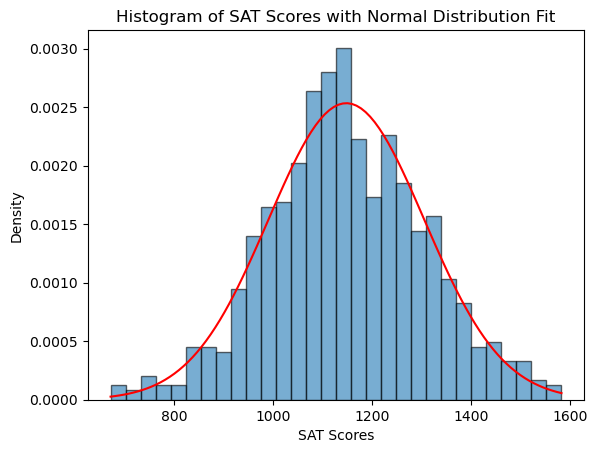

Probability that someone scored higher than 1200:

Using P(x >= 1200): 0.36

Using integration: 0.3681258730435535


In [3]:
# SAT
mean = np.mean(sat)
std = np.std(sat)
x = np.linspace(min(sat), max(sat), 100)
pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)

plt.hist(sat, 30, density=True, alpha=0.6, edgecolor='black')
plt.plot(x, pdf, 'r-')
plt.xlabel('SAT Scores')
plt.ylabel('Density')
plt.title('Histogram of SAT Scores with Normal Distribution Fit')
plt.show()

# Calculate probabilities
def f(x):
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)

counting = np.sum(sat >= 1200) / len(sat)
integral, error = quad(f, 1200, 1600)

print('Probability that someone scored higher than 1200:\n')
print(f'Using P(x >= 1200): {counting}\n')
print(f'Using integration: {integral}')

The results for probability here are essentially the same

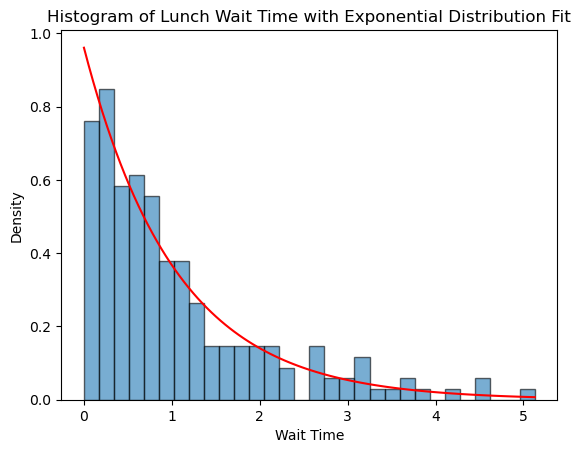

Probability that you have to wait more than 5 minutes:

Using P(x >= 5): 0.005

Using integration: 0.008185573299829978


In [4]:
# Lunch Wait Time
lambda_param = 1 / np.mean(lunch)
x = np.linspace(min(lunch), max(lunch), 100)
pdf = lambda_param * np.exp(-lambda_param * x)

plt.hist(lunch, 30, density=True, alpha=0.6, edgecolor='black')
plt.plot(x, pdf, 'r-')
plt.xlabel('Wait Time')
plt.ylabel('Density')
plt.title('Histogram of Lunch Wait Time with Exponential Distribution Fit')
plt.show()

# Calculate probabilities
def f(x):
    return lambda_param * np.exp(-lambda_param * x)

counting = np.sum(lunch >= 5) / len(lunch)
integral, error = quad(f, 5, np.inf)

print('Probability that you have to wait more than 5 minutes:\n')
print(f'Using P(x >= 5): {counting}\n')
print(f'Using integration: {integral}')

The results here for probability indicate a larger difference as compared to calculating the SAT probabilities with the normal distribution. This is due to the nature of the exponential distribution

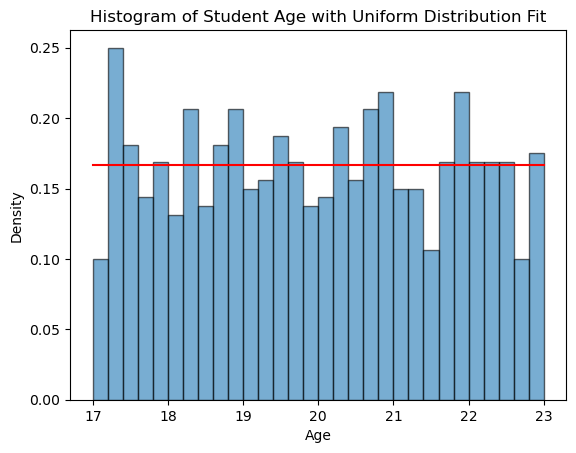

In [7]:
# Student Age
mean = np.mean(age)
std = np.std(age)
min_age = min(age)
max_age = max(age)
x = np.linspace(min_age, max_age)
pdf = np.where((x >= min_age) & (x <= max_age), 1 / (max_age - min_age), 0)

plt.hist(age, 30, density=True, alpha=0.6, edgecolor='black')
plt.plot(x, pdf, 'r-')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Histogram of Student Age with Uniform Distribution Fit')
plt.show()

Question 3

In [11]:
def p(x):
    return x**2 - x + 1

# Compute the integral from 0 to b and subtract 1
def equation(b):
    integral, error = quad(p, 0, b)
    return integral - 1

# Solve for b using fsolve
initial_guess = 1
b_solution = fsolve(equation, initial_guess)
print(f'Value for b: {b_solution[0]}')

Value for b: 1.1536528590388293
